# Classifying hand-written digits

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset is one of the oldest datasets around for machine learning, usually the one that most learners would work on as they foray into the field. Let's build a simple  Dense neural net to classify handwritten digits. Thereafter, we shall build a second model which is more sophisticated, a Convolutional Neural Network or convnet, to see if we can get better results.  
  
The MNIST dataset is already preloaded into Keras, making it very convenient for users to work with the dataset. Here we load *mnist* from *keras.datasets*

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(training_input_origin, training_label_origin), (test_input_origin, test_label_origin) = mnist.load_data()

print("Training input size:", training_input_origin.shape)
print("Training label size:", training_label_origin.shape)
print("Test input size:", test_input_origin.shape)
print("Test label size:", test_label_origin.shape)

Training input size: (60000, 28, 28)
Training label size: (60000,)
Test input size: (10000, 28, 28)
Test label size: (10000,)


There are 60,000 sets of training data. The inputs consist of images of size 28X28 pixels, each looking like a handwritten digit. Each input has a corresponding label that reveals the actual TRUE label. Another 10,000 sets of data are set aside for testing, so that we can use them to evaluate how accurate our neural network is after it's been trained.  
  
Below is a glimpse of handwritten digit images.  

![alt text](https://cdn-images-1.medium.com/max/1600/1*yBdJCRwIJGoM7pwU-LNW6Q.png "MNIST")

Next we flatten the 28X28 pixels into a single row of size 784 (= 28X28).THis is because our simple Neural Network only accepts 1D tensors as input. Note that  
`training_input_origin.shape[0]` = 60000  
`training_input_origin.shape[1]` = 28  
`training_input_origin.shape[2]` = 28  

In [3]:
unrolled_shape = training_input_origin.shape[1]*training_input_origin.shape[2]
print("The shape of each training input is", unrolled_shape)

The shape of each training input is 784


When training a 
Each pixel has a max value of 255, so we normalize the training and test inputs by dividing them by 255.

In [4]:
import numpy as np

training_input = training_input_origin.reshape(60000, unrolled_shape).astype('float32')
training_input /= 255

test_input = test_input_origin.reshape(10000, unrolled_shape).astype('float32')
test_input /=255

We also convert the labels into one-hot variables. There will be 10 classes.

In [5]:
from keras.utils import to_categorical

training_label = to_categorical(training_label_origin,num_classes=10)
test_label = to_categorical(test_label_origin,num_classes= 10)
print(" The first 4 training labels", training_label_origin[0:4], "\n", "becomes","\n", training_label[0:4])

 The first 4 training labels [5 0 4 1] 
 becomes 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 1) Dense Net

Next, we build a single-hidden-layer DenseNet with 512 nodes in the first layer and 10 nodes in the second layer.

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512,activation = "relu", input_shape = (unrolled_shape,)))
model.add(Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Next, compile the model by specifiying loss to be [categorical cross entropy](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy).

In [7]:
model.compile(loss = "categorical_crossentropy",
             metrics = ["accuracy"],
             optimizer = "rmsprop")

Let's train the model for just 12 epochs.

In [8]:
history = model.fit(training_input, training_label, 
                    batch_size = 128, epochs = 12,
                   validation_split = 0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/12
51000/51000 [==============================] - 2s 46us/step - loss: 0.2774 - acc: 0.9196 - val_loss: 0.1371 - val_acc: 0.9622
Epoch 2/12
51000/51000 [==============================] - 2s 44us/step - loss: 0.1131 - acc: 0.9664 - val_loss: 0.0955 - val_acc: 0.9736
Epoch 3/12
51000/51000 [==============================] - 2s 44us/step - loss: 0.0755 - acc: 0.9776 - val_loss: 0.0802 - val_acc: 0.9770
Epoch 4/12
51000/51000 [==============================] - 2s 44us/step - loss: 0.0541 - acc: 0.9837 - val_loss: 0.0777 - val_acc: 0.9788
Epoch 5/12
51000/51000 [==============================] - 2s 44us/step - loss: 0.0398 - acc: 0.9879 - val_loss: 0.0817 - val_acc: 0.9748
Epoch 6/12
51000/51000 [==============================] - ETA: 0s - loss: 0.0307 - acc: 0.991 - 2s 44us/step - loss: 0.0307 - acc: 0.9915 - val_loss: 0.0665 - val_acc: 0.9823
Epoch 7/12
51000/51000 [==============================] - 2s 45us/step - loss: 0.0235 - acc

Let's plot our loss and accuracy to check for any sign of overfitting.

In [17]:
val_loss = history.history['val_loss']
loss = history.history['loss']
val_acc = history.history['val_acc']
acc = history.history['acc']
epochs = range(1,len(val_loss)+1)

Text(0.5,1,'Training vs Validation Loss')

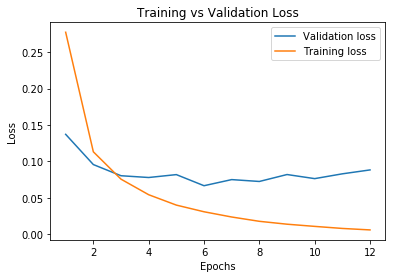

In [18]:
plt.plot(epochs, val_loss, label = "Validation loss")
plt.plot(epochs, loss, label = "Training loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

Seems like the validation loss stagnated after the 3rd epoch.

Text(0.5,1,'Training vs Validation Accuracy')

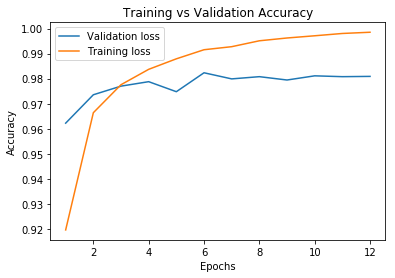

In [19]:
plt.plot(epochs, val_acc, label = "Validation loss")
plt.plot(epochs, acc, label = "Training loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")


Validation accuracy also hovered around 98% after the 3rd epochs. However, both accuracy and loss just stagnate, rather than deteriorate as the number of epochs increase.

Let's evaluate the DenseNet on test data.

In [32]:
result = model.evaluate(test_input, test_label)
print("Loss on test set:", result[0])
print("Accuracy on test set:", result[1])

10000/10000 [==============================] - 0s 31us/step
Loss on test set: 0.0776928879627114
Accuracy on test set: 0.9814


The model was able to classify 98% of the test data correctly.    

Let's identify all the wrong predictions.


In [33]:
preds = np.argmax(model.predict(test_input),axis = 1)
wrong_preds = np.where((preds != test_label_origin) == True)
print("The first 10 wrong predictions came from the following index {}".format(wrong_preds[0][:10]))

The first 10 wrong predictions came from the following index [119 247 321 340 445 578 582 619 659 684]


We can do a visual inspection of those wrongly classified.

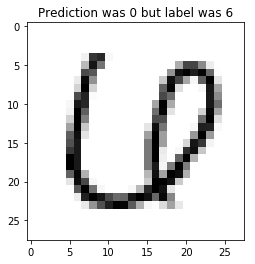

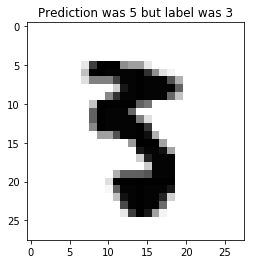

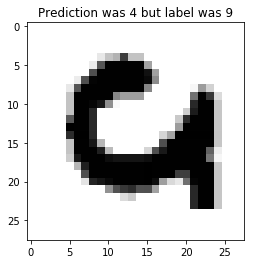

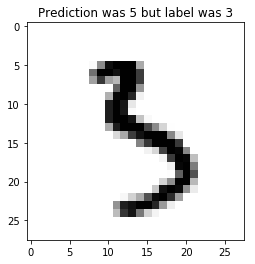

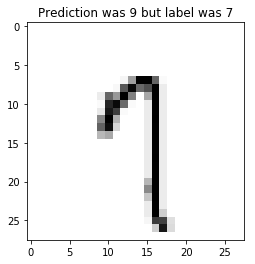

In [22]:
def Get_wrong_prediction(wrong_preds,number):
    return np.random.choice(wrong_preds[0],number, replace = False)

plt.clf()
for pic in Get_wrong_prediction(wrong_preds,5):
    plt.imshow(test_input_origin[pic], cmap = plt.cm.binary)
    plt.title("Prediction was "+ str(preds[pic]) + " but label was "+ str(test_label_origin[pic]))
    plt.show()

## 2) Convnet

Next we build a Convnet. It's much more complex than DenseNet, but has been shown to give good results in computer vision.

In [23]:
from keras import layers
from keras import models

In [24]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3),
                        activation = 'relu',
                        input_shape = (28,28,1)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3),
                        activation = 'relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation = 'relu'))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

In [25]:
model1.compile(loss = "categorical_crossentropy",
             metrics = ["accuracy"],
             optimizer = "rmsprop")

Different from the 1D tensor fed into Densenet, inputs for convnet will be a 3D tensor. Let's reshape the inputs  

In [26]:
training_input1 = training_input_origin.reshape((60000, 28, 28,1)).astype('float32')
training_input1 /=255

test_input1 = test_input_origin.reshape(((10000, 28, 28,1))).astype('float32')
test_input1 /= 255

We'll train the convnet for 12 epochs as well.

In [27]:
history1 = model1.fit(training_input1, training_label, 
                    batch_size = 128, epochs = 12,
                   validation_split = 0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/12
51000/51000 [==============================] - 16s 322us/step - loss: 0.2693 - acc: 0.9173 - val_loss: 0.1026 - val_acc: 0.9702
Epoch 2/12
51000/51000 [==============================] - 16s 320us/step - loss: 0.0699 - acc: 0.9782 - val_loss: 0.0843 - val_acc: 0.9758
Epoch 3/12
51000/51000 [==============================] - 16s 313us/step - loss: 0.0455 - acc: 0.9853 - val_loss: 0.0611 - val_acc: 0.9831
Epoch 4/12
51000/51000 [==============================] - 17s 325us/step - loss: 0.0341 - acc: 0.9894 - val_loss: 0.0490 - val_acc: 0.9863
Epoch 5/12
51000/51000 [==============================] - 16s 307us/step - loss: 0.0263 - acc: 0.9918 - val_loss: 0.0502 - val_acc: 0.9857
Epoch 6/12
51000/51000 [==============================] - 16s 305us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0408 - val_acc: 0.9897
Epoch 7/12
51000/51000 [==============================] - 16s 317us/step - loss: 0.0175 - acc: 0.9946 - val_loss: 0.0

Plot the loss and accuracy to check for signs of overfitting.

In [28]:
val_loss = history1.history['val_loss']
loss = history1.history['loss']
val_acc = history1.history['val_acc']
acc = history1.history['acc']
epochs = range(1,len(val_loss)+1)

Text(0.5,1,'Training vs Validation Loss')

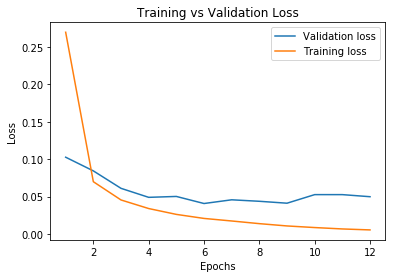

In [29]:
import matplotlib.pyplot as plt

plt.plot(epochs, val_loss, label = "Validation loss")
plt.plot(epochs, loss, label = "Training loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

Text(0.5,1,'Training vs Validation Accuracy')

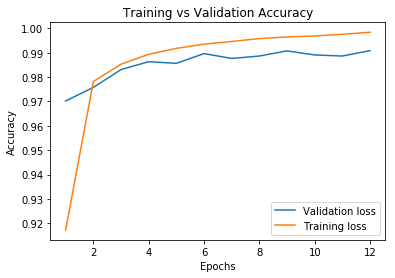

In [30]:
plt.plot(epochs, val_acc, label = "Validation loss")
plt.plot(epochs, acc, label = "Training loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

Let's evaluate convnet on the test data.

In [34]:
result1 = model1.evaluate(test_input1, test_label)
print("Loss on test set:", result1[0])
print("Accuracy on test set:", result1[1])

10000/10000 [==============================] - 1s 124us/step
Loss on test set: 0.04367553985681575
Accuracy on test set: 0.9896


The convnet model has an accuracy of 99% and loss of 0.043. Let's compare the two models.

| Model        |  Loss           |Accuracy  |
| ------------- |-------------| -----|
| DenseNet      | 0.0776 | 0.9814 |
| ConvNet       | 0.043      |   0.9896 |


Check where convnet made mistakes on the test data.

In [37]:
preds1 = np.argmax(model1.predict(test_input1),axis = 1)
wrong_preds1 = np.where((preds1 != test_label_origin) == True)
print("The first 10 wrong predictions came from the following index {}".format(wrong_preds1[0][:10]))

The first 10 wrong predictions came from the following index [ 320  340  445  646  659  674  882  947 1014 1039]


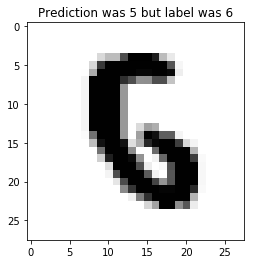

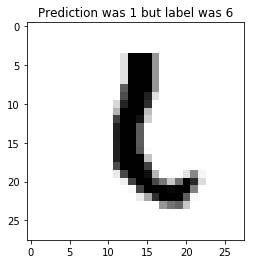

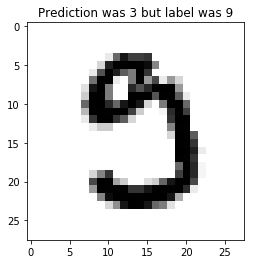

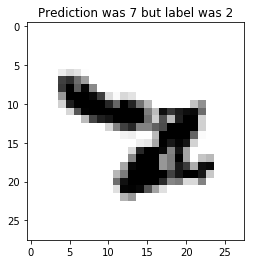

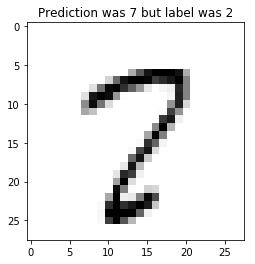

In [36]:
def Get_wrong_prediction(wrong_preds,number):
    return np.random.choice(wrong_preds[0],number, replace = False)

plt.clf()
for pic in Get_wrong_prediction(wrong_preds1,5):
    plt.imshow(test_input_origin[pic], cmap = plt.cm.binary)
    plt.title("Prediction was "+ str(preds[pic]) + " but label was "+ str(test_label_origin[pic]))
    plt.show()

Reference:  
  
  
1) Deep Learning with Python - Francois Chollet  
2) Deep Learning with Keras - Antonio Gulli, Sujit Pal  
3) [Fastai lesson 1](http://course.fast.ai/lessons/lesson1.html)